In [35]:
!pip install yfinance statsmodels prophet keras tensorflow

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [37]:
from google.colab import files
uploaded = files.upload()

Saving Google 2020-2025 Stock Market.csv to Google 2020-2025 Stock Market (2).csv


In [38]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv("Google 2020-2025 Stock Market.csv")

# Show first few rows
df.head()

,Date,Close,Open,High,Low,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1/2/20,68.37,67.08,68.41,67.08,1406731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/3/20,68.03,67.39,68.63,67.28,1179289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/6/20,69.71,67.50,69.83,67.50,1733149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/7/20,69.67,69.90,70.15,69.52,1511693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/8/20,70.22,69.60,70.58,69.54,1529177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Drop all columns that contain only NaNs (mostly 'Unnamed' columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Sort by date
df = df.sort_index()

# Check for null values
print("Missing values:\n", df.isnull().sum())

# Drop or fill missing values (if any)
df.dropna(inplace=True)

# Check the cleaned dataset
df.info()
df.head()

Missing values:
 Close     0
Open      0
High      0
Low       0
Volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1264 entries, 2020-01-02 to 2025-01-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1264 non-null   float64
 1   Open    1264 non-null   float64
 2   High    1264 non-null   float64
 3   Low     1264 non-null   float64
 4   Volume  1264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.2 KB


/tmp/ipython-input-39-3362378599.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-39-3362378599.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Open,High,Low,Volume
Date,,,,,
2020-01-02,68.37,67.08,68.41,67.08,1406731
2020-01-03,68.03,67.39,68.63,67.28,1179289
2020-01-06,69.71,67.50,69.83,67.50,1733149
2020-01-07,69.67,69.90,70.15,69.52,1511693
2020-01-08,70.22,69.60,70.58,69.54,1529177


In [40]:
# Summary statistics
df.describe()

,Close,Open,High,Low,Volume
count,1264.000000,1264.000000,1264.000000,1264.000000,1.264000e+03
mean,120.258552,120.170657,121.568204,118.923718,1.221421e+07
std,33.201725,33.237409,33.447748,33.006317,1.289118e+07
min,52.830000,52.830000,53.570000,50.680000,3.467530e+05
25%,94.325000,94.347500,95.700000,92.750000,1.418133e+06
50%,121.370000,121.115000,122.670000,120.130000,4.081277e+06
75%,141.852500,142.115000,143.265000,140.822500,2.068623e+07
max,198.160000,198.530000,202.880000,196.690000,9.779857e+07


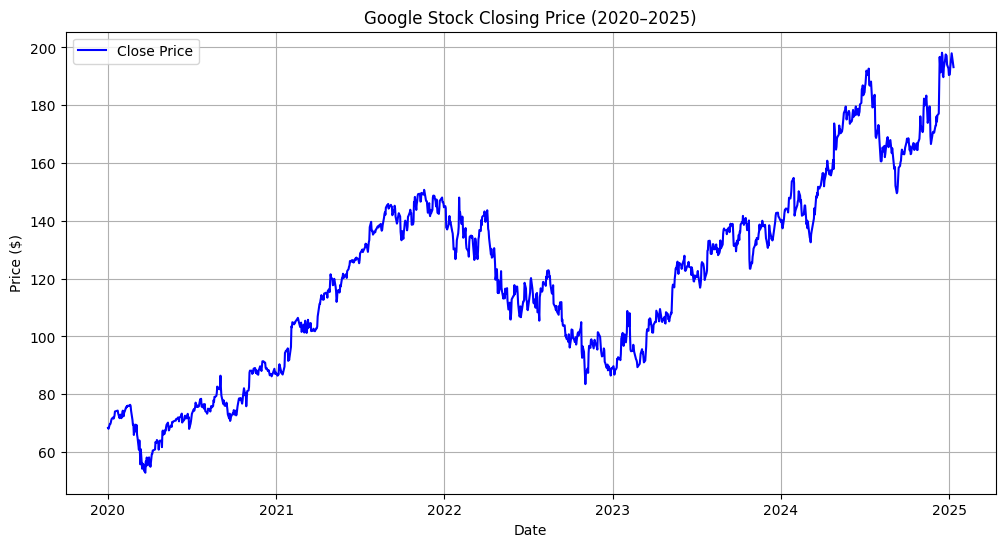

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title("Google Stock Closing Price (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()

In [42]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.update_layout(title="Candlestick Chart - Google Stock (2020–2025)", xaxis_title="Date", yaxis_title="Price")
fig.show()


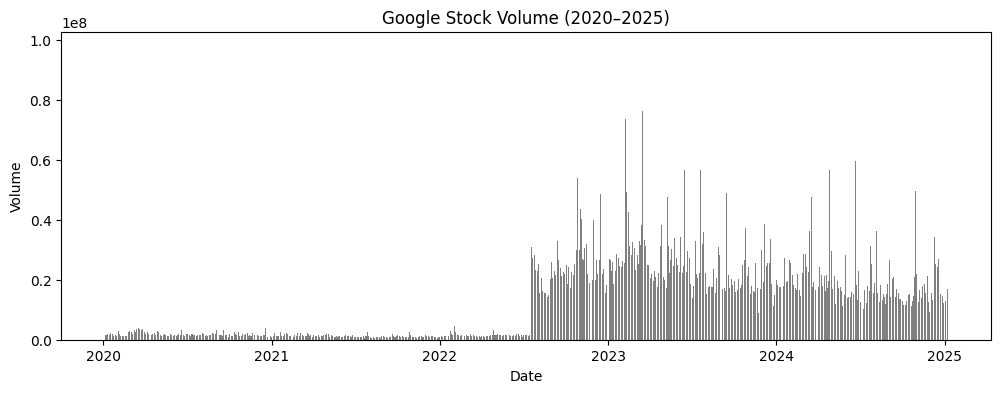

In [43]:
plt.figure(figsize=(12,4))
plt.bar(df.index, df['Volume'], width=1.0, color='gray')
plt.title("Google Stock Volume (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


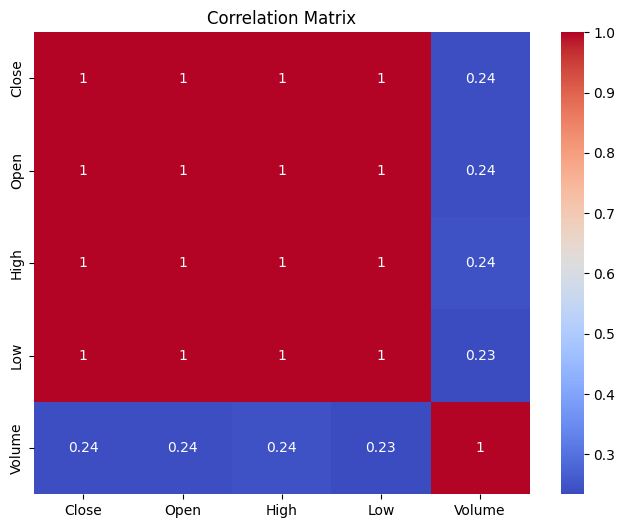

In [44]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [45]:
df.to_csv("Cleaned_Google_Stock.csv")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

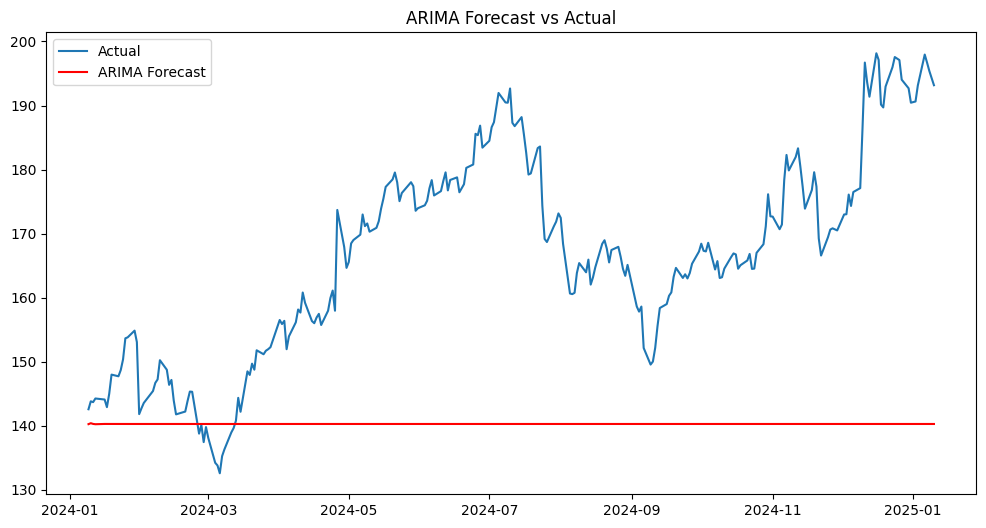

In [46]:
# Arima model
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# ARIMA requires stationary data (we'll use log returns)
df['LogClose'] = np.log(df['Close'])

# Split
train_size = int(len(df) * 0.8)
train, test = df['LogClose'][:train_size], df['LogClose'][train_size:]

# Fit ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = np.exp(forecast)  # Convert back to price

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size:], np.exp(test), label='Actual')
plt.plot(df.index[train_size:], forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a su

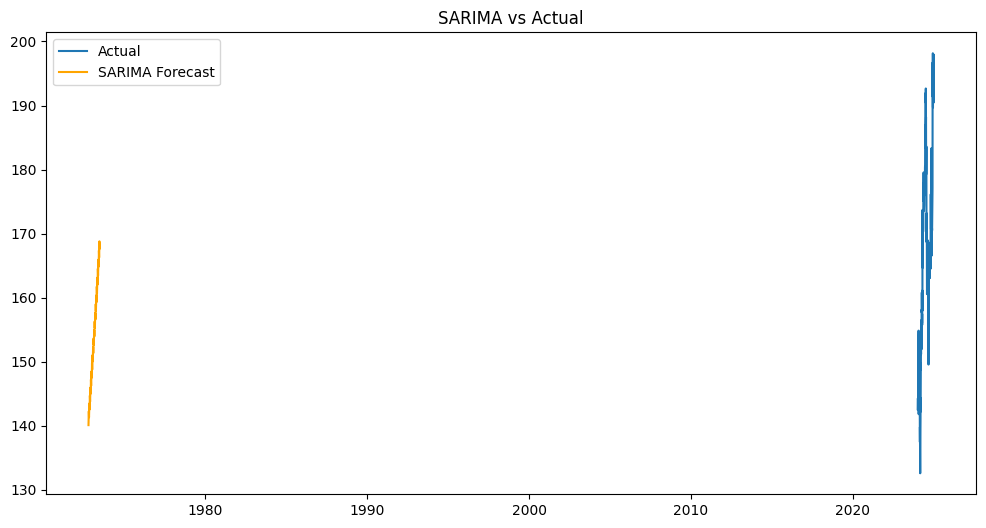

In [47]:
# sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA example
sarima_model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

# Forecast
sarima_forecast = sarima_result.forecast(steps=len(test))
sarima_forecast = np.exp(sarima_forecast)

# Plot
plt.figure(figsize=(12,6))
plt.plot(np.exp(test), label="Actual")
plt.plot(sarima_forecast, label="SARIMA Forecast", color='orange')
plt.title("SARIMA vs Actual")
plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnu3so_jj/_v2yrna_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnu3so_jj/989ll2xa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26797', 'data', 'file=/tmp/tmpnu3so_jj/_v2yrna_.json', 'init=/tmp/tmpnu3so_jj/989ll2xa.json', 'output', 'file=/tmp/tmpnu3so_jj/prophet_model6ld4cvma/prophet_model-20250723133228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


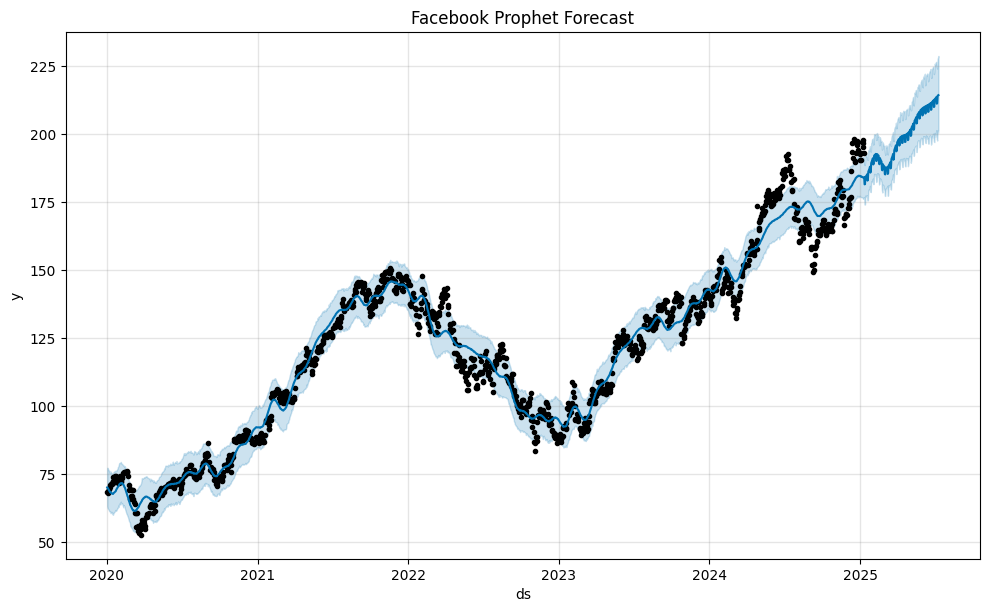

In [48]:
# prophet model
!pip install prophet

from prophet import Prophet

# Prepare data for Prophet
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

# Train Prophet
model = Prophet()
model.fit(df_prophet)

# Future prediction
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title("Facebook Prophet Forecast")
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - loss: 0.0664 - val_loss: 0.0062
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0030 - val_loss: 0.0049
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 9.7660e-04 - val_loss: 0.0019
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 9.5094e-04 - val_loss: 0.0022
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 9.1818e-04 - val_loss: 0.0026
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 9.7742e-04 - val_loss: 0.0023
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 9.7154e-04 - val_loss: 0.0028
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 9.2280e-04 - val_loss: 0.0018
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


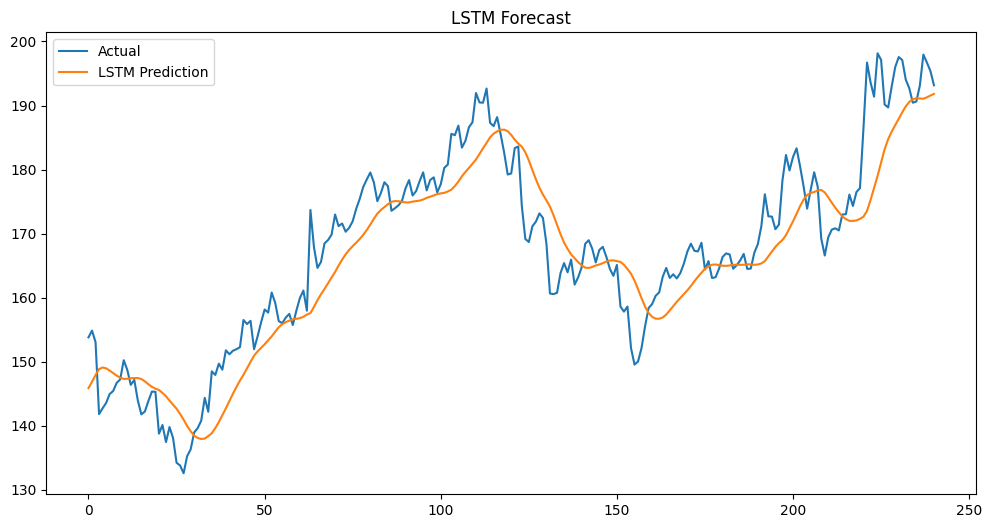

In [49]:
# LSTM Model
!pip install tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Prepare sequences
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Train-test split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Predict
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='LSTM Prediction')
plt.legend()
plt.title("LSTM Forecast")
plt.show()

Model Comparison and Tuning (ARIMA, SARIMA, Prophet, LSTM)

In [50]:
# Define RMSE Evaluation Function
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [51]:
pip install streamlit

In [52]:
%%writefile app.py
import pandas as pd
import numpy as np
import joblib
import streamlit as st

# Load the model and structure
model = joblib.load("pollution_model.pkl")
model_cols = joblib.load("model_columns.pkl")

# Let's create an User interface
st.title("Water Pollutants Predictor")
st.write("Predict the water pollutants based on Year and Station ID")

# User inputs
year_input = st.number_input("Enter Year", min_value=2000, max_value=2100, value=2022)
station_id = st.text_input("Enter Station ID", value='1')

# To encode and then predict
if st.button('Predict'):
    if not station_id:
        st.warning('Please enter the station ID')
    else:
        # Prepare the input
        input_df = pd.DataFrame({'year': [year_input], 'id':[station_id]})
        input_encoded = pd.get_dummies(input_df, columns=['id'])

        # Align with model cols
        for col in model_cols:
            if col not in input_encoded.columns:
                input_encoded[col] = 0
        input_encoded = input_encoded[model_cols]

        # Predict
        predicted_pollutants = model.predict(input_encoded)[0]
        pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

        st.subheader(f"Predicted pollutant levels for the station '{station_id}' in {year_input}:")
        for p, val in zip(pollutants, predicted_pollutants):
            st.write(f'{p}: {val:.2f}')


Overwriting app.py


In [53]:
!pip install streamlit pyngrok

In [54]:
!ngrok authtoken 305YMTLnx5qv7bnyGCkemXrmNtT_7EcGqPGvBShL2LTWPf6Lr

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [55]:
import os
import threading
def run_streamlit():
  os.system('streamlit run app.py --server.port 8501')
thread = threading.Thread(target=run_streamlit)
thread.start()

In [56]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url = ngrok.connect(8501)
print("your streamlit app is live here:", public_url)

your streamlit app is live here: NgrokTunnel: "https://249a326c4148.ngrok-free.app" -> "http://localhost:8501"
